# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [93]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/steveteeters/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [94]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv('news_api_key')

In [95]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [135]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy', page_size=100)
bitcoin
print(f"Total articles about Bitcoin: {bitcoin['totalResults']}")
bitcoin['articles'][0]

Total articles about Bitcoin: 7523


{'source': {'id': None, 'name': 'New York Times'},
 'author': 'Jonah E. Bromwich',
 'title': 'Ex-Party Producer Charged in $2.7 Million Bitcoin-Laundering Scheme',
 'description': 'Thomas Spieker’s clients included dark-web drug dealers and a cellphone-hacking identity thief, prosecutors said.',
 'url': 'https://www.nytimes.com/2022/03/24/nyregion/thomas-spieker-bitcoin-scheme.html',
 'urlToImage': 'https://static01.nyt.com/images/2022/03/24/nyregion/24ny-bitcoin1/24ny-bitcoin1-facebookJumbo.jpg',
 'publishedAt': '2022-03-24T22:50:30Z',
 'content': 'Mr. Spiekers most prominent customer, whom he described as his whale client, was the Eastern European organized crime member, prosecutors said. Mr. Spieker laundered $620,000 for the client, they sai… [+2755 chars]'}

In [137]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy", page_size=100)
ethereum
print(f"Total articles about Ethereum: {ethereum['totalResults']}")
ethereum['articles'][0]

Total articles about Ethereum: 3813


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

In [138]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

cols = ['compound', 'negative', 'neutral', 'positive', 'text', 'date']
bitcoin_df = bitcoin_df[cols]
bitcoin_scores_df = bitcoin_df.drop(columns=['date'])
bitcoin_scores_df.head()

,compound,negative,neutral,positive,text
0,-0.2280,0.097,0.831,0.072,"Mr. Spiekers most prominent customer, whom he ..."
1,-0.1154,0.154,0.730,0.116,"Other fund vehicles hold crypto directly, but ..."
2,0.0000,0.000,1.000,0.000,"When Russia invaded Ukraine, Niki Proshin was ..."
3,0.4939,0.000,0.877,0.123,"SAN SALVADOR, March 23 (Reuters) - El Salvador..."
4,-0.7713,0.169,0.831,0.000,"""Bitcoin was seen by many of its libertarian-l..."


In [139]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass

ethereum_df = pd.DataFrame(ethereum_sentiments)

cols = ['compound', 'negative', 'neutral', 'positive', 'text', 'date']
ethereum_df = ethereum_df[cols]
ethereum_scores_df = ethereum_df.drop(columns=['date'])
ethereum_scores_df.head()

,compound,negative,neutral,positive,text
0,-0.3182,0.093,0.848,0.059,"In February, shit hit the fan in the usual way..."
1,-0.4588,0.083,0.917,0.000,Illustration by James Bareham / The Verge\r\n\...
2,0.0000,0.000,1.000,0.000,His name is Vitalik Buterin and after dedicati...
3,-0.1326,0.044,0.956,0.000,"It seems that in 2022, you cant escape from th..."
4,0.8340,0.050,0.713,0.236,"If it sounds too good to be true, youre not wr..."


In [140]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_scores_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.00000,100.000000,100.000000
mean,0.083282,0.04452,0.885260,0.070190
std,0.430523,0.05808,0.079002,0.067114
min,-0.778300,0.00000,0.699000,0.000000
25%,-0.226725,0.00000,0.837500,0.000000
50%,0.000000,0.00000,0.876000,0.069500
75%,0.430825,0.08325,0.940750,0.099000
max,0.910000,0.18700,1.000000,0.301000


In [124]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_scores_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.138579,0.038200,0.886350,0.075440
std,0.436094,0.059614,0.085302,0.073034
min,-0.913600,0.000000,0.682000,0.000000
25%,-0.051600,0.000000,0.838750,0.000000
50%,0.083500,0.000000,0.902000,0.068500
75%,0.510600,0.061750,0.947250,0.111000
max,0.867600,0.312000,1.000000,0.290000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum at .075440 to Bitcoin's .070190

Q: Which coin had the highest compound score?

A: Bitcoin at .910000 to Ethereum's .867600

Q. Which coin had the highest positive score?

A: Bitcoin at .301000 to Ethereum's .290000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [141]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [152]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop_addons = {'shit', 'fan', 'ha', 'like'}

In [153]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in stop.union(stop_addons)]
    
    return tokens

In [154]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_scores_df['tokens'] = bitcoin_scores_df['text'].apply(tokenizer)
bitcoin_scores_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.2280,0.097,0.831,0.072,"Mr. Spiekers most prominent customer, whom he ...","[mr, spiekers, prominent, customer, described,..."
1,-0.1154,0.154,0.730,0.116,"Other fund vehicles hold crypto directly, but ...","[fund, vehicle, hold, crypto, directly, theyre..."
2,0.0000,0.000,1.000,0.000,"When Russia invaded Ukraine, Niki Proshin was ...","[russia, invaded, ukraine, niki, proshin, wa, ..."
3,0.4939,0.000,0.877,0.123,"SAN SALVADOR, March 23 (Reuters) - El Salvador...","[san, salvador, march, reuters, el, salvador, ..."
4,-0.7713,0.169,0.831,0.000,"""Bitcoin was seen by many of its libertarian-l...","[bitcoin, wa, seen, many, libertarianleaning, ..."


In [155]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_scores_df['tokens'] = ethereum_scores_df['text'].apply(tokenizer)
ethereum_scores_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.3182,0.093,0.848,0.059,"In February, shit hit the fan in the usual way...","[february, hit, usual, way, old, tweet, resurf..."
1,-0.4588,0.083,0.917,0.000,Illustration by James Bareham / The Verge\r\n\...,"[illustration, james, bareham, verge, million,..."
2,0.0000,0.000,1.000,0.000,His name is Vitalik Buterin and after dedicati...,"[name, vitalik, buterin, dedicating, cover, re..."
3,-0.1326,0.044,0.956,0.000,"It seems that in 2022, you cant escape from th...","[seems, cant, escape, metaversefrom, facebook,..."
4,0.8340,0.050,0.713,0.236,"If it sounds too good to be true, youre not wr...","[sound, good, true, youre, wrong, yield, farmi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [156]:
from collections import Counter
from nltk import ngrams

In [157]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_text = ''.join(bitcoin_scores_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bigram_bitcoin = Counter(ngrams(bitcoin_processed, n=2))

In [158]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_text = ''.join(ethereum_scores_df.text)
ethereum_processed = tokenizer(ethereum_text)
bigram_ethereum = Counter(ngrams(ethereum_processed, n=2))

In [159]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [160]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_top = token_count(bitcoin_processed)
bitcoin_top

[('bitcoin', 30),
 ('reuters', 29),
 ('cryptocurrency', 23),
 ('march', 21),
 ('crypto', 20),
 ('ukraine', 17),
 ('digital', 15),
 ('us', 15),
 ('cryptocurrencies', 12),
 ('week', 11)]

In [161]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top = token_count(ethereum_processed)
ethereum_top

[('cryptocurrency', 20),
 ('year', 16),
 ('digital', 16),
 ('ethereum', 15),
 ('cryptocurrencies', 13),
 ('charsthe', 13),
 ('market', 12),
 ('crypto', 12),
 ('ukraine', 12),
 ('nft', 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

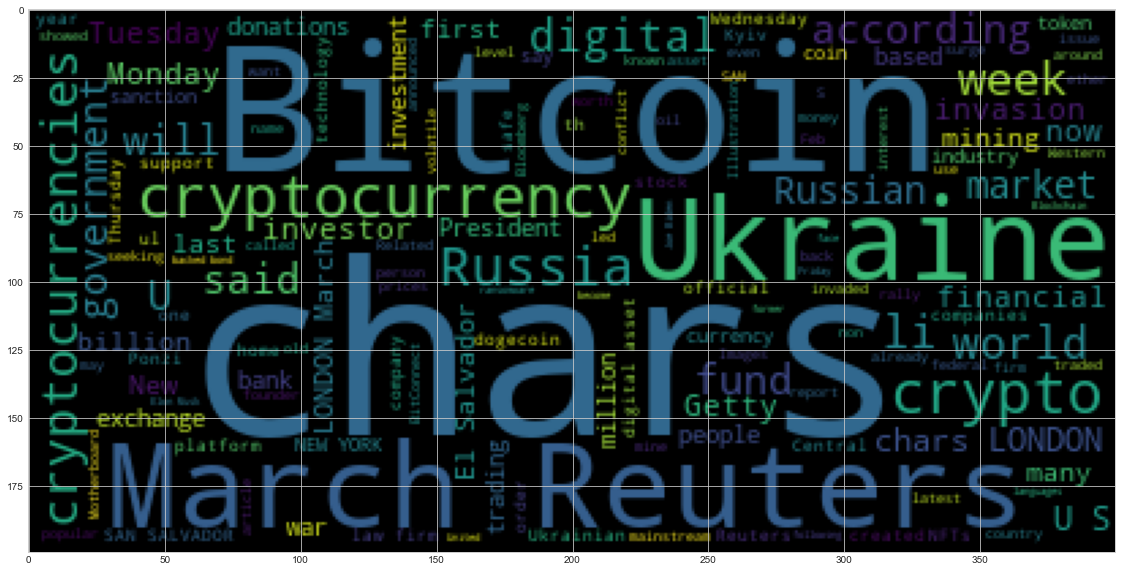

In [162]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_wc = WordCloud().generate(bitcoin_text)
plt.imshow(bitcoin_wc)

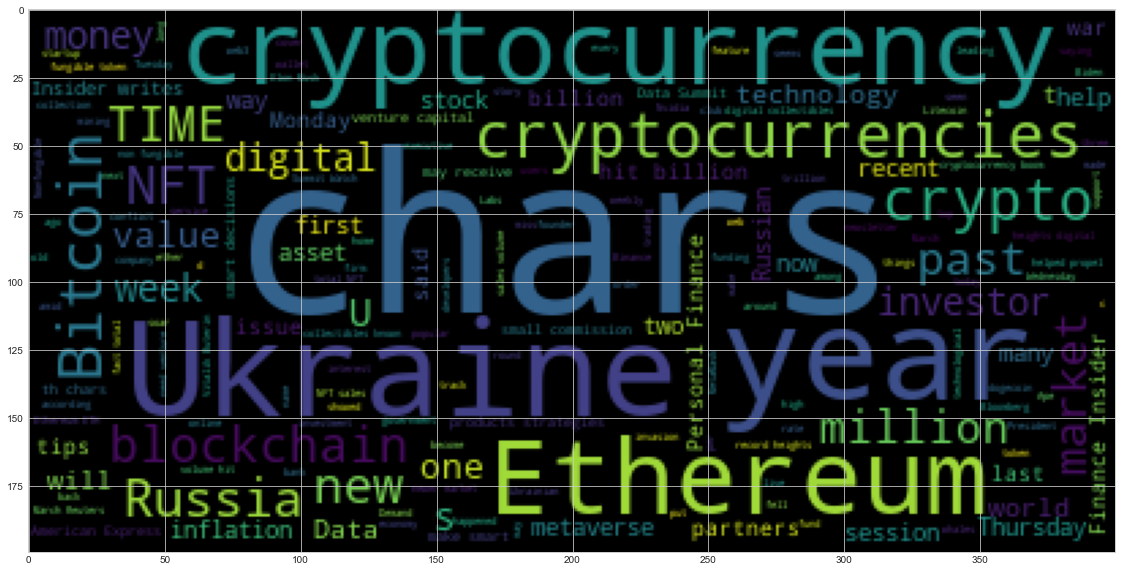

In [163]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_wc = WordCloud().generate(ethereum_text)
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [118]:
import spacy
from spacy import displacy

In [119]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 9.5 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [120]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [165]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = ''.join(bitcoin_scores_df.text)

In [166]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_NER = nlp(bitcoin_text)

# Add a title to the document
# YOUR CODE HERE!
bitcoin_NER.user_data['title'] = 'Bitcoin NER'

In [167]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_NER, style = 'ent')

In [168]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_NER.ents:
    print(ent.text + '' + ent.label_)

SpiekersPERSON
Eastern EuropeanNORP
SpiekerPERSON
620,000MONEY
Grayscale Bitcoin TrustORG
RussiaGPE
UkraineGPE
Niki ProshinPERSON
a yearDATE
YouTubeORG
TikTokORG
InstagramORG
RussianNORP
March 23DATE
ReutersORG
El SalvadorGPE
BinancePERSON
CentralORG
the New York TimesORG
22CARDINAL
ReutersORG
ReutersORG
RussiaGPE
UkraineGPE
Satoshi NakamotoPERSON
2008DATE
Nonfungible TidbitsPERSON
this weekDATE
RussiaGPE
UkraineGPE
UkrainiansNORP
RussianNORP
+3275ORG
this weekDATE
Getty
Welcome toORG
Nonfungible TidbitsPERSON
weeklyDATE
this weekDATE
GettyGPE
RussiaGPE
last ThursdayDATE
UkranianNORP
Mexico CityGPE
TelegrORG
March 4DATE
ReutersORG
RussiaGPE
UkraineGPE
RussiaGPE
March 22DATE
ReutersORG
El SalvadorGPE
last weekDATE
finanGPE
ReutersORG
U.S.GPE
Joe BidenPERSON
chars]KENNERDELLORG
Pa.GPE
March 21DATE
ReutersORG
March 22DATE
ReutersORG
TuesdayDATE
almost three weeksDATE
RussiaGPE
UkraineGPE
March 22DATE
ReutersORG
El SalvadorGPE
last weekDATE
finanGPE
Summary</li><li>WORK_OF_ART
Law firms</l

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = ''.join(ethereum_scores_df.text)

In [169]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_NER = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!
ethereum_NER.user_data['title'] = 'Ethereum NER'

In [170]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_NER, style = 'ent')

In [172]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_NER.ents:
    print(ent.text + '' + ent.label_)

FebruaryDATE
Ethereum Name ServiceORG
ENSORG
May 201DATE
James BarehamPERSON
More than $15 millionMONEY
More than $15 millionMONEY
UkrainianGPE
RussiaGPE
Vitalik ButerinPERSON
TIMEORG
BloombergGPE
Getty ImagesPERSON
28-year-oldDATE
RussianNORP
2022DATE
FacebookORG
MicrosoftORG
the last yearDATE
Bored Ape Yacht ClubORG
oneCARDINAL
EthereumPERSON
the past few yearsDATE
NFTORG
$23 billionMONEY
the past few yearsDATE
NFTORG
$24 billionMONEY
BidenPERSON
WednesdayDATE
firstORDINAL
TIMEORG
weeklyDATE
the past few yearsDATE
NFTORG
$23 billionMONEY
the past few yearsDATE
NFTORG
$23 billionMONEY
chars]NEW YORKGPE
March 21DATE
ReutersORG
a second straight weekDATE
CoinSharesORG
MondayDATE
chars]IfPERSON
EthereumORG
March 24DATE
ReutersORG
LeumiPERSON
firstORDINAL
IsraeliNORP
Pepper InvestORG
ThursdayDATE
U.SGPE
$450 millionMONEY
SeriesEVENT
USGPE
over $7 billionMONEY
RussiaGPE
UkraineGPE
American ExpressORG
daysDATE
March 11DATE
Yuga LabsPERSON
MeebitsNORP
Larva LabsPERSON
more than a dozenCARDIN

---